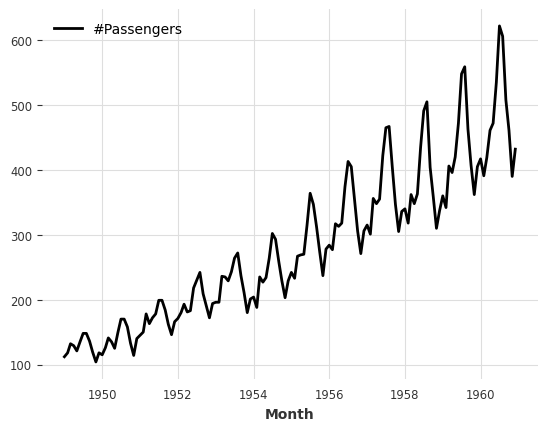

In [8]:
from darts.datasets import AirPassengersDataset
import pandas as pd
from darts import TimeSeries
series = AirPassengersDataset().load()
series.plot()
train, val = series.split_before(pd.Timestamp("19580101"))


<Axes: xlabel='Month'>

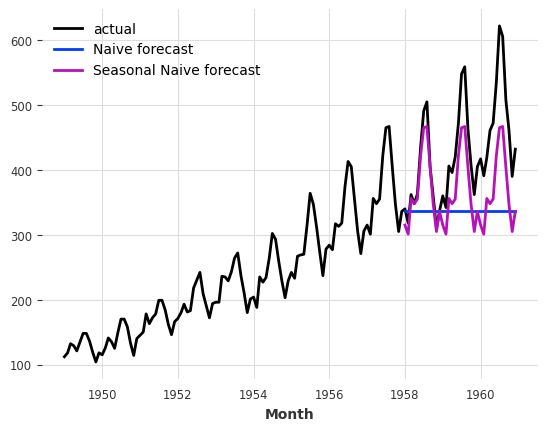

In [13]:
from darts.models import NaiveSeasonal
naive_model = NaiveSeasonal(K=1) # random walk 적용
naive_model.fit(train)
naive_forecast = naive_model.predict(len(val))
series.plot(label='actual')
naive_forecast.plot(label='Naive forecast')
seasonal_model = NaiveSeasonal(K=12) # seasonal random walk 적용
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(len(val))
seasonal_forecast.plot(label='Seasonal Naive forecast')

<Axes: xlabel='Month'>

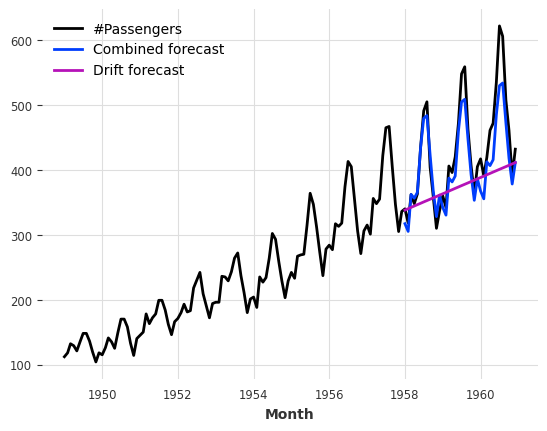

In [ ]:
# dift를 가진 random walk 모형. 선형성을 가짐
from darts.models import NaiveDrift
drift_model = NaiveDrift()
drift_model.fit(train)
drift_forecast = drift_model.predict(len(val))
combined_forecast = drift_forecast + seasonal_forecast - train.last_value()
series.plot()
combined_forecast.plot(label='Combined forecast')
drift_forecast.plot(label='Drift forecast')

In [20]:
from darts.metrics import mape
print("Naive Drift + Seasonal Drift의 결합된 모델의 MAPE:", mape(val, combined_forecast))

Naive Drift + Seasonal Drift의 결합된 모델의 MAPE: 5.660848396158498
